In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv(r'C:\henry_Chang\final_project\model\data\ML_total_industry_lastest_v4.csv')

In [3]:
df1

company_id company_name  year  pre_tax_income  income_tax_expense  \
0            1101           台泥  2001        223575.0             33000.0   
1            1101           台泥  2002        316737.0             30000.0   
2            1101           台泥  2003       2232182.0            470000.0   
3            1101           台泥  2004       4653526.0            232000.0   
4            1101           台泥  2005       6085844.0            309549.0   
...           ...          ...   ...             ...                 ...   
27452        5876         上海商銀  2016      19219160.0           4107035.0   
27453        5876         上海商銀  2017      21208877.0           4589911.0   
27454        5876         上海商銀  2018      22936681.0           4575035.0   
27455        5876         上海商銀  2019      24630823.0           4906344.0   
27456        5876         上海商銀  2020      21553768.0           3739152.0   

       cont_oper_IL  discont_oper_IL      profit   parent_PL  \
0          190575.0              0.0    190575.0    190575.0   
1          286737.0              0.0    286737.0    286737.0   
2         1762182.0              0.0   1762182.0   1762182.0   
3         4421526.0              0.0   4421526.0   4421526.0   
4         5776295.0         -72928.0   5703367.0   5703367.0   
...             ...              ...         ...         ...   
27452    15112125.0              0.0  15112125.0  11748332.0   
27453    16618966.0              0.0  16618966.0  12385227.0   
27454    18361646.0              0.0  18361646.0  13711971.0   
27455    19724479.0              0.0  19724479.0  14661111.0   
27456    17814616.0              0.0  17814616.0  13462945.0   

       jointly_control_PL  ...  control_interest  non_control_interest  \
0                     0.0  ...               0.0                   0.0   
1                     0.0  ...               0.0                   0.0   
2                     0.0  ...               0.0                   0.0   
3                     0.0  ...               0.0                   0.0   
4                     0.0  ...               0.0                   0.0   
...                   ...  ...               ...                   ...   
27452                 0.0  ...               0.0            42788926.0   
27453                 0.0  ...               0.0            40623295.0   
27454                 0.0  ...               0.0            46865979.0   
27455                 0.0  ...               0.0            50658706.0   
27456                 0.0  ...               0.0            49995956.0   

       total_equity  proceeds_issued  total_treasury_shares  \
0        44142550.0              0.0                    0.0   
1        48046279.0              0.0                12270.0   
2        48887732.0              0.0                12515.0   
3        52105463.0              0.0                12953.0   
4        56420387.0              0.0                13601.0   
...             ...              ...                    ...   
27452   163022430.0              0.0                11397.0   
27453   163033094.0              0.0                11397.0   
27454   178021926.0              0.0                11397.0   
27455   204226325.0              0.0                11397.0   
27456   205099212.0              0.0                11397.0   

       book_value_per_share  cash_dividend  stock_dividend  dividend_value  \
0                     16.93       0.000000        0.000000        0.000000   
1                     18.17       0.100000        0.200000        0.346000   
2                     18.12       0.350000        0.350000        0.990500   
3                     18.63       0.700000        0.500000        1.722500   
4                     18.94       1.405943        0.156216        1.801169   
...                     ...            ...             ...             ...   
27452                 29.56       1.500000        0.000000        1.500000   
27453                 30.09       1.800000        0.000

In [4]:
df1.shape

(27457, 30)

## 將cash_dividend =0 的值減少

In [ ]:
mask = (df1['cash_dividend']>0)

In [ ]:
df_nonzero =df1[mask]

In [ ]:
df_nonzero.shape

In [ ]:
df_zero = df1[~mask]

In [ ]:
df_zero.shape

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
seed=42

In [ ]:
df_zero_del, df_zero_save =  train_test_split(df_zero,test_size=0.1,random_state=seed)

In [ ]:
df_zero_save.shape

In [ ]:
df1 = pd.concat([df_nonzero,df_zero_save],axis = 0)

In [ ]:
df1.shape

## 將cash_dividend >20 的值刪除

In [ ]:
df1 = df1[df1['cash_dividend'] <20]

In [ ]:
df1.shape

## 相關矩陣

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cols = df1.columns[3:]

In [7]:
cols

Index(['pre_tax_income', 'income_tax_expense', 'cont_oper_IL',
       'discont_oper_IL', 'profit', 'parent_PL', 'jointly_control_PL',
       'non_control_PL', 'earning_per_share', 'total_assets',
       'total_liabilities', 'stocks', 'capital_reserve', 'retained_earnings',
       'other_equity_interest', 'treasury_stock', 'parent_equity',
       'control_interest', 'non_control_interest', 'total_equity',
       'proceeds_issued', 'total_treasury_shares', 'book_value_per_share',
       'cash_dividend', 'stock_dividend', 'dividend_value', 'all_dividend'],
      dtype='object')

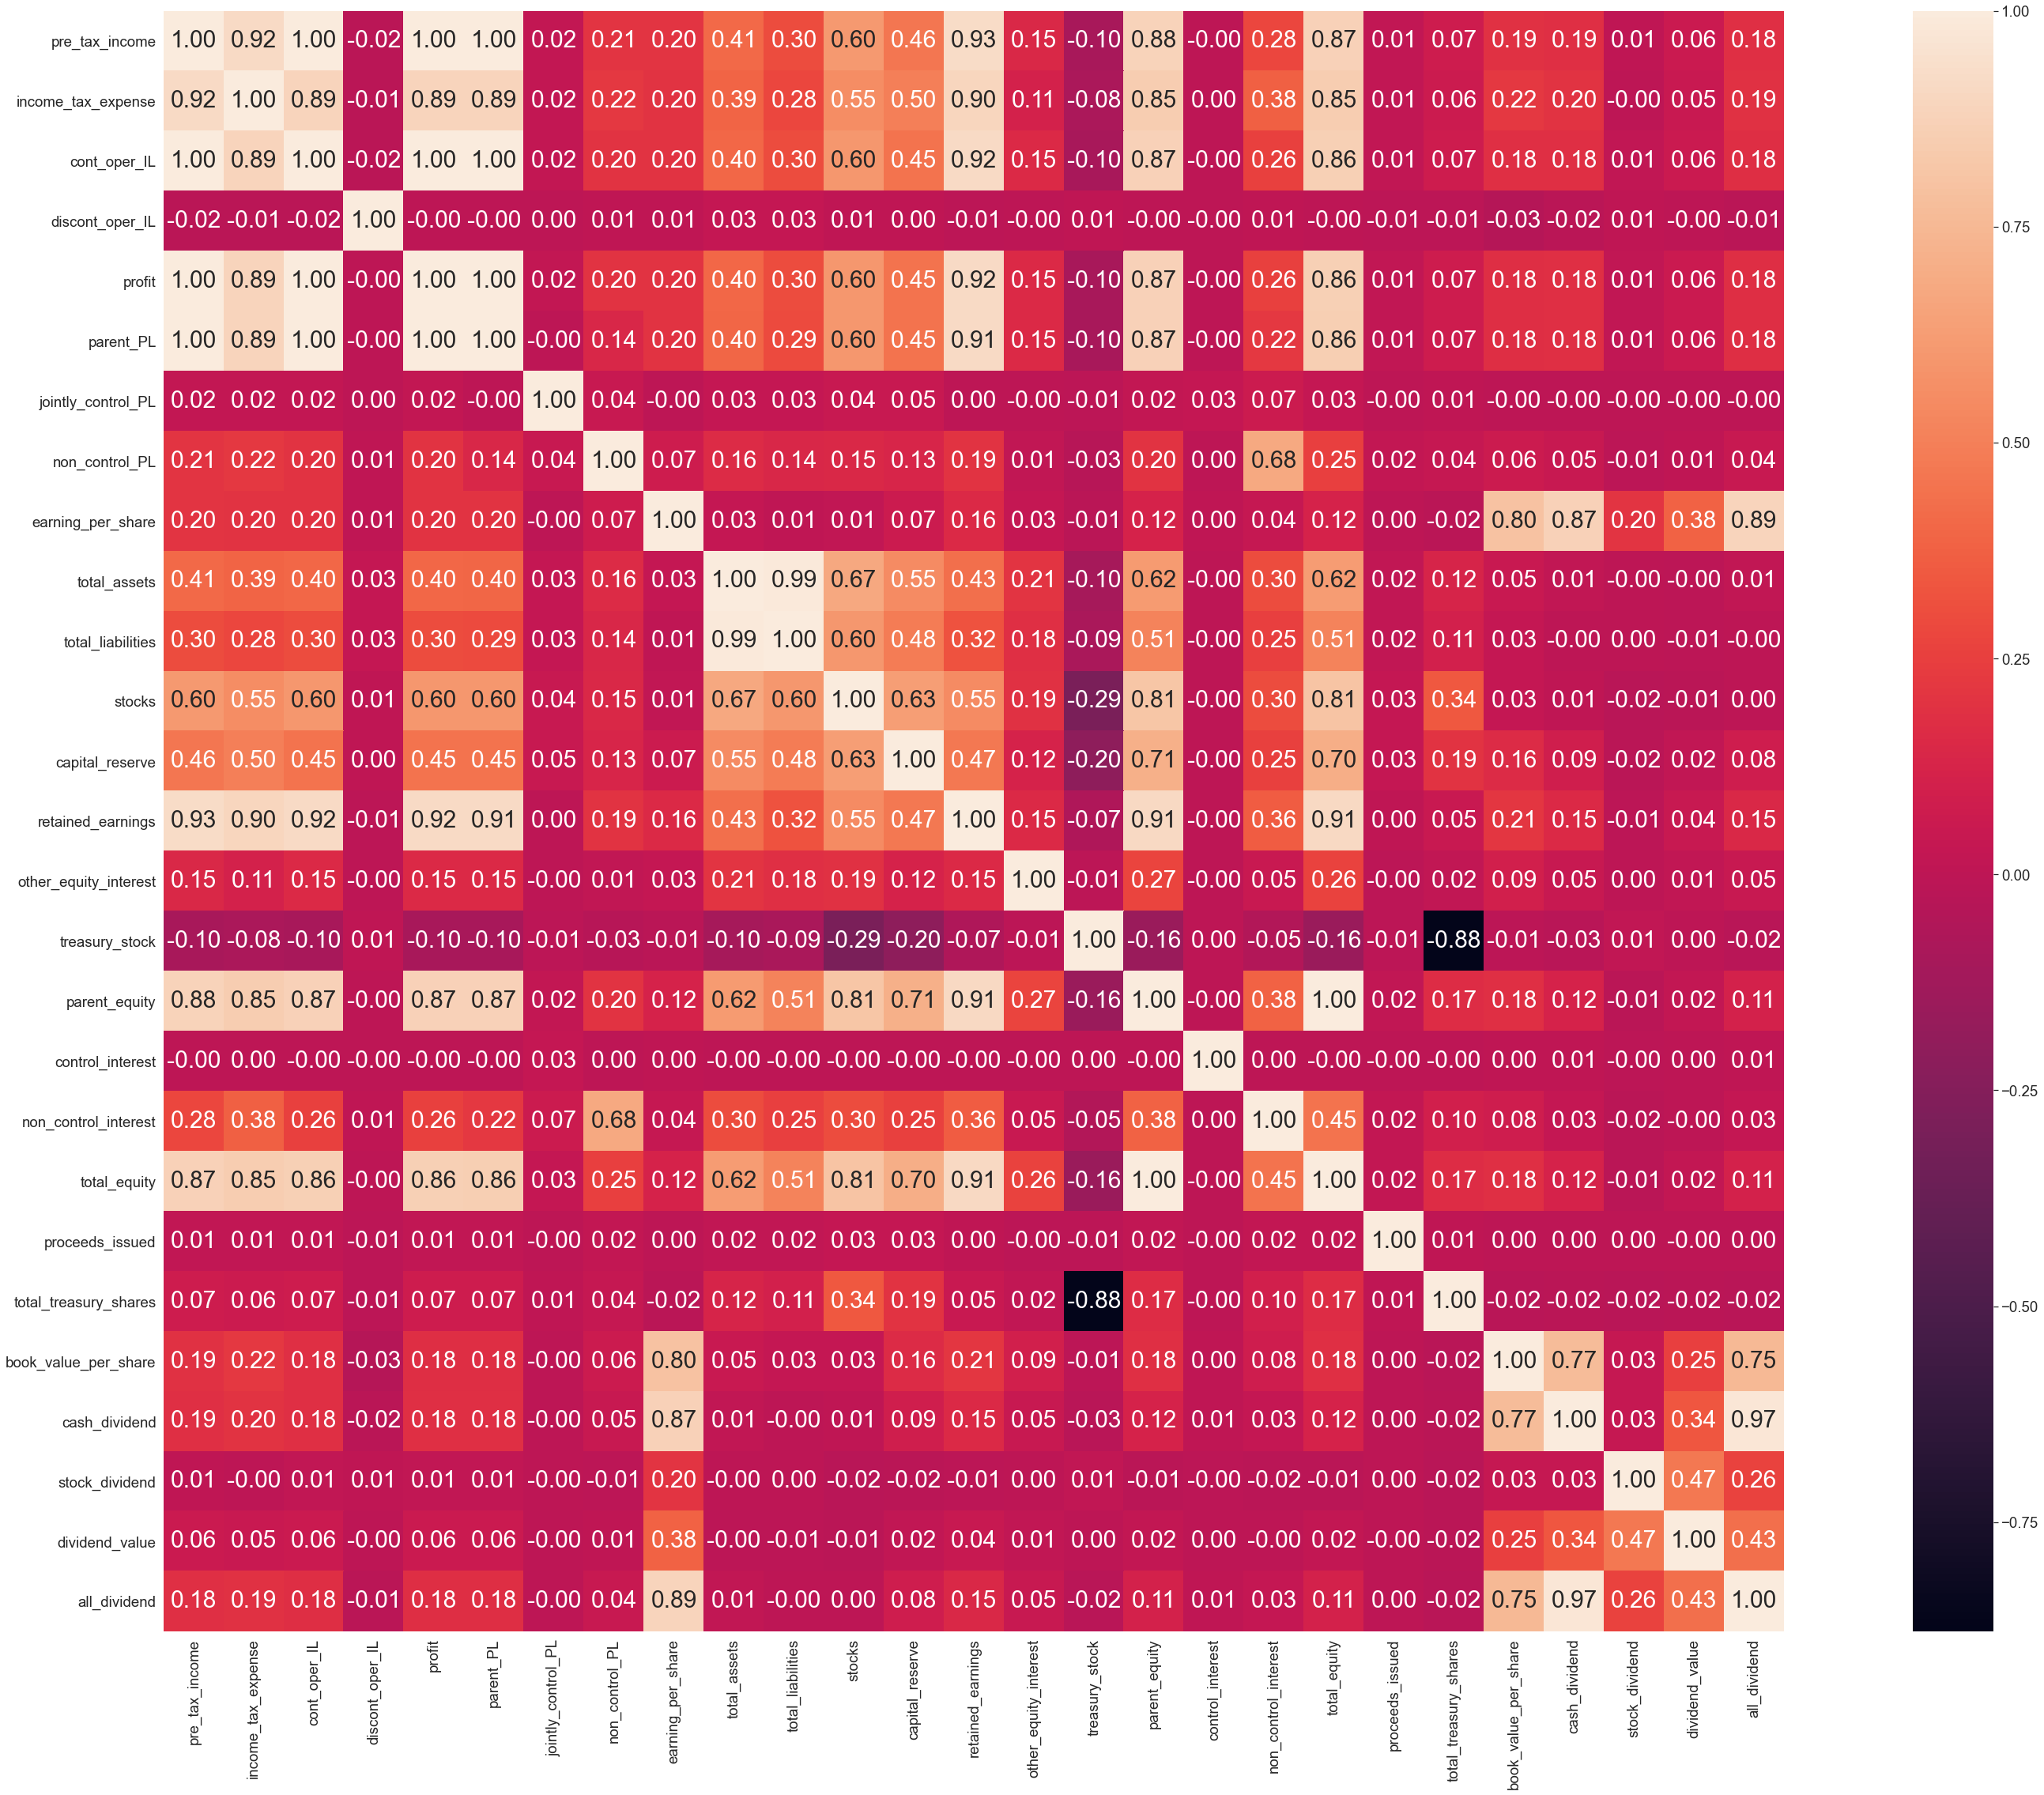

In [8]:
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.7)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 30},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout(rect=(0,0,8,8))

plt.show()

## 將數據集分為訓練用跟測試用

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
seed=42

In [11]:
X = df1.iloc[:,3:26].values #特徵值為3-25
y_cash = df1['cash_dividend'].values  #標籤是cash_dividend
y_dividend = df1['all_dividend'].values  #標籤是all_dividend = cash_dividend+stock_dividend

In [12]:
from sklearn.preprocessing import StandardScaler
#建立StandardScaler物件
sc = StandardScaler()
# 資料標準化
X_std = sc.fit_transform(X)

In [18]:
# y_cash
X_train, X_test, y_cash_train, y_cash_test =  train_test_split(X, y_cash,test_size=0.30,random_state=seed)

## XGBOOST - y_cash

In [19]:
from xgboost import XGBRegressor
import time

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
start = time.process_time() 
xgb = XGBRegressor(
#     objective='reg:squarederror',
    n_estimators=200, # 1-1000 
    max_depth=12, # 1-16
    min_child_weight=0.1,  # 0.1-2
    colsample_bytree=0.95, # 0-1
    subsample=0.8, # 0-1
    reg_alpha=3, # >0
    reg_lambda=1, # >0
    learning_rate=0.2, #預設0.3  0-1
) 
xgb.fit(X_train,y_cash_train)
print(time.process_time() - start)

y_cash_train_pred = xgb.predict(X_train)
y_cash_test_pred = xgb.predict(X_test)
print('測試正確率: %.3f' % xgb.score(X_test, y_cash_test))
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_cash_train, y_cash_train_pred),
        mean_squared_error(y_cash_test, y_cash_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_cash_train, y_cash_train_pred),
        r2_score(y_cash_test, y_cash_test_pred)))

61.15625
測試正確率: 0.868
MSE train: 0.015, test: 0.794
R^2 train: 0.997, test: 0.868


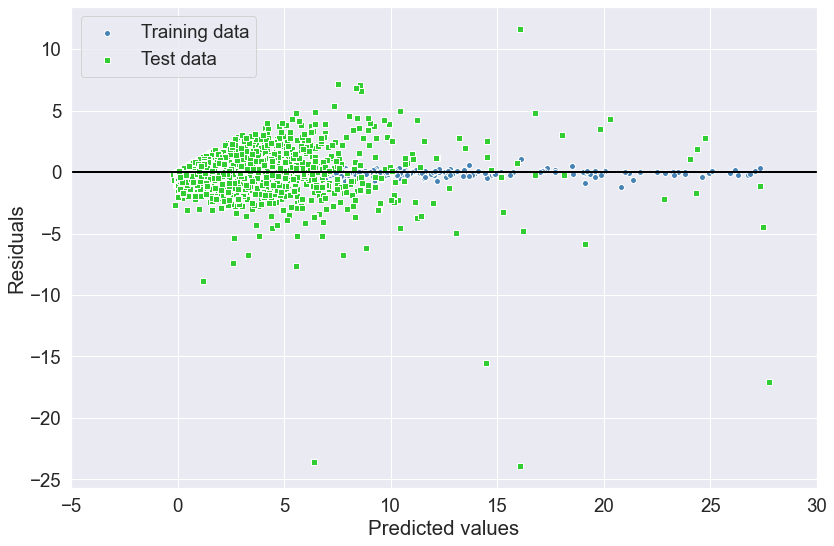

In [34]:
# 殘差圖
plt.scatter(y_cash_train_pred,  y_cash_train_pred - y_cash_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_cash_test_pred,  y_cash_test_pred - y_cash_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-5, 30])
# plt.ylim([-30, 30])
plt.tight_layout(rect=(0,0,2,2))

plt.savefig('demo5_1.png', dpi=500)
plt.show()

## 儲存model

In [35]:
import joblib

In [36]:
joblib.dump(xgb,'xgb_cash.pkl')

['xgb_cash.pkl']